In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanicDF=pd.read_csv('titanic.csv')
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
titanicDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# 중복제거
titanicDF.drop_duplicates(ignore_index=True,inplace=True)

In [6]:
# 결측값확인
titanicDF.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# 데크컬럼 제거
titanicDF.drop(columns='deck',inplace=True)

# embarked와 enbarked town 중복 제거
titanicDF.drop(columns='embark_town',inplace=True)

# survive와 alive 중복제거
titanicDF.drop(columns='alive',inplace=True)

# adult_male 제거
titanicDF.drop(columns='adult_male',inplace=True)

# class pcclass 중복 제거
titanicDF.drop(columns='class',inplace=True)

In [8]:
titanicDF['embarked'].value_counts()

# 결측값 N 처리?

titanicDF['embarked'].fillna('N',inplace=True)

In [9]:
titanicDF['who'].value_counts()

who
man      451
woman    251
child     82
Name: count, dtype: int64

In [10]:
groupobj=titanicDF.groupby('who')

In [11]:
groupobj.groups.keys()

dict_keys(['child', 'man', 'woman'])

In [12]:
groupobj.groups['child']

Index([  7,   9,  10,  14,  16,  22,  24,  39,  43,  49,  57,  58,  62,  75,
       105, 113, 118, 139, 156, 157, 163, 164, 173, 174, 175, 184, 193, 219,
       223, 245, 261, 279, 285, 316, 323, 327, 343, 350, 354, 375, 383, 395,
       405, 406, 408, 425, 433, 434, 440, 474, 478, 484, 485, 492, 549, 565,
       569, 604, 607, 610, 612, 638, 649, 663, 664, 668, 686, 689, 696, 697,
       708, 709, 718, 724, 729, 732, 735, 736, 750, 752, 767, 772],
      dtype='int64')

In [13]:
# age 결측값 처리 위해 who를 기준으로 나이 평균값 계산
childmean=titanicDF.loc[groupobj.groups['child'],'age'].mean()
manmean=titanicDF.loc[groupobj.groups['man'],'age'].mean()
womanmean=titanicDF.loc[groupobj.groups['woman'],'age'].mean()

In [14]:
for row in titanicDF.index:
    if pd.isna(titanicDF.loc[row,'age']):
        if titanicDF.loc[row,'who']=='man':
            titanicDF.loc[row,'age']=manmean
        elif titanicDF.loc[row,'who']=='woman':
            titanicDF.loc[row,'age']=womanmean
        elif titanicDF.loc[row,'who']=='child':
            titanicDF.loc[row,'age']=childmean

In [15]:
titanicDF.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64

In [16]:
# 의미가 중복되는 sex who중 sex 제거
titanicDF.drop(columns='sex',inplace=True)

In [17]:
titanicDF.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who,alone
0,0,3,22.0,1,0,7.2500,S,man,False
1,1,1,38.0,1,0,71.2833,C,woman,False
2,1,3,26.0,0,0,7.9250,S,woman,True
3,1,1,35.0,1,0,53.1000,S,woman,False
4,0,3,35.0,0,0,8.0500,S,man,True


In [18]:
# 남녀 생존율 확인
titanicDF.groupby(['who','survived'])['survived'].count()

who    survived
child  0            34
       1            48
man    0           366
       1            85
woman  0            61
       1           190
Name: survived, dtype: int64

<Axes: xlabel='who', ylabel='survived'>

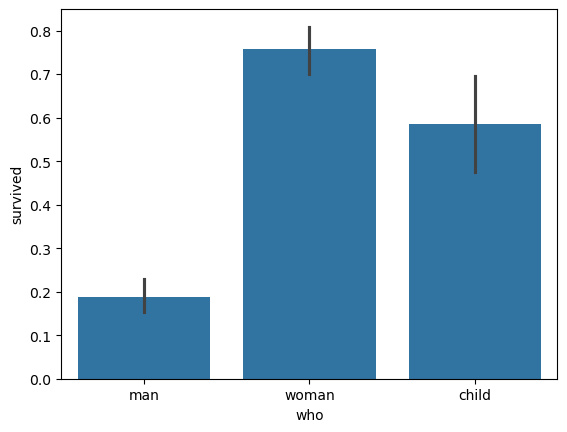

In [19]:
sns.barplot(x='who',y='survived',data=titanicDF)

<Axes: xlabel='pclass', ylabel='survived'>

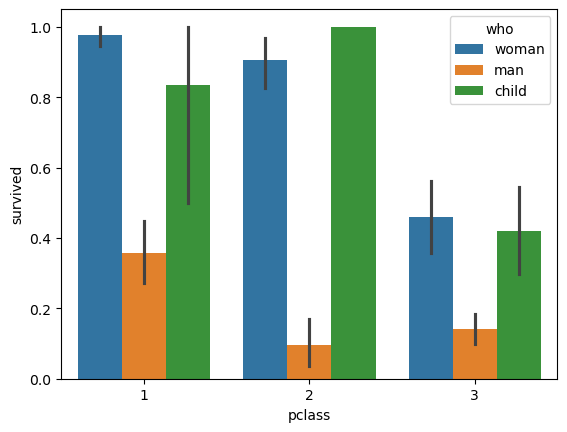

In [20]:
#class별 생존율
sns.barplot(x='pclass',y='survived',hue='who',data=titanicDF)

In [21]:
# 입력 age에 따라 구분값을 반환하는 함수 설정
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager' 
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'

    return cat

# x값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda식에 생성한 함수 반환값으로 지정
titanicDF['age_cat']=titanicDF['age'].apply(lambda x : get_category(x))
titanicDF

,survived,pclass,age,sibsp,parch,fare,embarked,who,alone,age_cat
0,0,3,22.000000,1,0,7.2500,S,man,False,Student
1,1,1,38.000000,1,0,71.2833,C,woman,False,Adult
2,1,3,26.000000,0,0,7.9250,S,woman,True,Young Adult
3,1,1,35.000000,1,0,53.1000,S,woman,False,Young Adult
4,0,3,35.000000,0,0,8.0500,S,man,True,Young Adult
...,...,...,...,...,...,...,...,...,...,...
779,0,3,39.000000,0,5,29.1250,Q,woman,False,Adult
780,1,1,19.000000,0,0,30.0000,S,woman,True,Student
781,0,3,31.985981,1,2,23.4500,S,woman,False,Young Adult
782,1,1,26.000000,0,0,30.0000,C,man,True,Young Adult


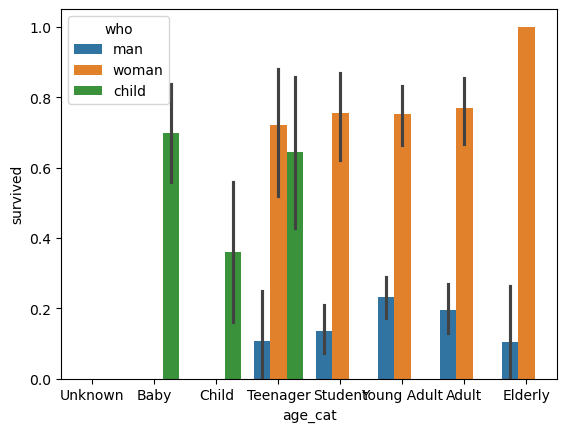

In [22]:
sns.barplot(x='age_cat',y='survived',hue='who',data=titanicDF,order=group_names)
titanicDF.drop(columns='age_cat',inplace=True)

In [23]:
# 범주형변수 - 수치화
from sklearn.preprocessing import LabelEncoder

def encode_feature(dataDF):
    features=['embarked','who','alone']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

titanicDF=encode_feature(titanicDF)
titanicDF.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who,alone
0,0,3,22.0,1,0,7.2500,3,1,0
1,1,1,38.0,1,0,71.2833,0,2,0
2,1,3,26.0,0,0,7.9250,3,2,1
3,1,1,35.0,1,0,53.1000,3,2,0
4,0,3,35.0,0,0,8.0500,3,1,1


In [24]:
# 타겟 추출하고 .. 피쳐 만들기
y_titanic=titanicDF['survived']
X_titanic=titanicDF.drop(columns='survived')

In [25]:
# train test셋 분리
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_titanic,y_titanic)

In [26]:
# 모델생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 인스턴스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

# dicisiontree 학습 예측 평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# randomforest 학습 예측 평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassfier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# logistic 학습 예측 평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 0.7704
RandomForestClassfier 정확도 : 0.7857
LogisticRegression 정확도 : 0.7500


In [27]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold=KFold(n_splits=folds)
    scores=[]

    # kfold 교차검증 수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic)):
        X_train,X_test=X_titanic.values[train_index],X_titanic.values[test_index]
        y_train,y_test=y_titanic.values[train_index],y_titanic.values[test_index]

        # 학습
        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} {accuracy:.4f}')

    # 5개 fold 평균 정확도 계산
    mean_score=np.mean(scores)
    print(f'평균 정확도 : {mean_score:.4f}')

# 함수호출
exec_kfold(rf_clf,folds=5)

교차 검증 0 0.7452
교차 검증 1 0.7452
교차 검증 2 0.7516
교차 검증 3 0.7516
교차 검증 4 0.7821
평균 정확도 : 0.7551


In [28]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(rf_clf,X_titanic,y_titanic,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} : {accuracy:.4f}')

print( f'평균 정확도 : {np.mean(scores):.4f}')

교차검증 0 : 0.7325
교차검증 1 : 0.7771
교차검증 2 : 0.7771
교차검증 3 : 0.7516
교차검증 4 : 0.7821
평균 정확도 : 0.7641


In [29]:
dt_clf.feature_importances_

array([0.11281129, 0.24676987, 0.08436931, 0.03771398, 0.2576072 ,
       0.01876942, 0.22541815, 0.01654077])

In [30]:
dt_clf.feature_names_in_

array(['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who',
       'alone'], dtype=object)